In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Cargo el modelo de Random Forest:

with open('../models/modelo_rf_grid.pkl', 'rb') as file:
    rf_reg = pickle.load(file)

In [3]:
# Cargo los datos con las transformaciones:

train_set = pd.read_csv('../data/TRANS_train_S4-KCCA.csv')
test_set = pd.read_csv('../data/TRANS_test_S4-KCCA.csv')

In [4]:
# Modifico la función para no tener en cuenta los outliers:

def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    plt.xlim(0, 100)
    plt.ylim(0, 100)

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

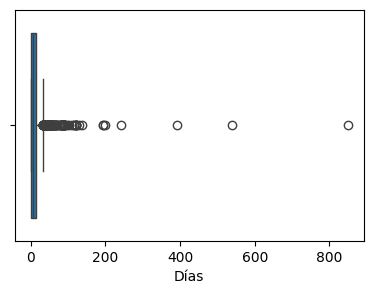

In [5]:
# Voy a probar de quitar los outliers de train:

fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.boxplot(x = "LOS", data = train_set);
axs.set_xlabel("Días")
axs.set_ylabel("");

In [6]:
train_set[train_set['LOS'] >= 100] # voy a eliminar estas 18 filas

,KennelCardBreed,LOS,age,intake_type_CONFISCATE,intake_type_CRUELTY,intake_type_DISPO REQ,intake_type_EUTH REQ,intake_type_FOSTER,intake_type_OWNED,intake_type_OWNER SURR,...,Breed_Vizsla,Breed_Weimaraner,Breed_Welsh Springer Spaniel,Breed_Welsh Terrier,Breed_West Highland White Terrier (Westie),Breed_Whippet,Breed_Wire Fox Terrier,Breed_Wirehaired Pointing Griffon,Breed_Working Kelpie,Breed_Yorkshire Terrier
2553,0,120,0.200000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2990,0,243,0.621447,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4261,1,137,0.341995,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5681,1,128,0.760590,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5701,0,110,0.736806,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5963,0,849,0.638250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6090,0,120,0.200000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6846,0,120,0.200000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7199,1,393,0.584804,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7730,1,117,0.621447,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
exclude = train_set[train_set['LOS'] >= 100].index

In [8]:
train_set_100 = train_set.drop(exclude, axis=0)

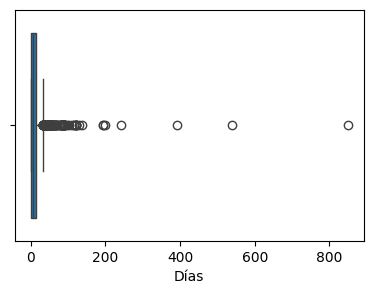

In [9]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.boxplot(x = "LOS", data = train_set);
axs.set_xlabel("Días")
axs.set_ylabel("");

In [10]:
train_set_100['LOS'].describe()

count    13921.000000
mean         9.945981
std         10.401244
min          0.000000
25%          2.000000
50%          7.000000
75%         14.000000
max         97.000000
Name: LOS, dtype: float64

In [11]:
X_train = train_set_100.drop('LOS',axis=1)
y_train = train_set_100['LOS']
X_test = test_set.drop('LOS',axis=1)
y_test = test_set['LOS']

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13921, 300)
(13921,)
(3485, 300)
(3485,)


In [13]:
# Voy a volver a entrenar un nuevo modelo, no uso el guardado:

params_grid = {
    "n_estimators": [100,200,400],
    "max_depth": [2,4,10],
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.3,0.6,1]
}

rf_grid = RandomizedSearchCV(rf_reg, 
                               cv = 3,
                               n_iter = 20,
                               param_distributions= params_grid, 
                               scoring = "neg_mean_squared_error")


rf_grid.fit(X_train, y_train)
print("RF best_score:", np.sqrt(-rf_grid.best_score_))

RF best_score: 7.4440770172625035


In [14]:
y_pred_forest = rf_grid.best_estimator_.predict(X_test)
print("MAE:", mean_absolute_error(y_test,y_pred_forest)) 
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_forest)))

MAE: 5.339711963886283
RMSE: 17.73365163073478


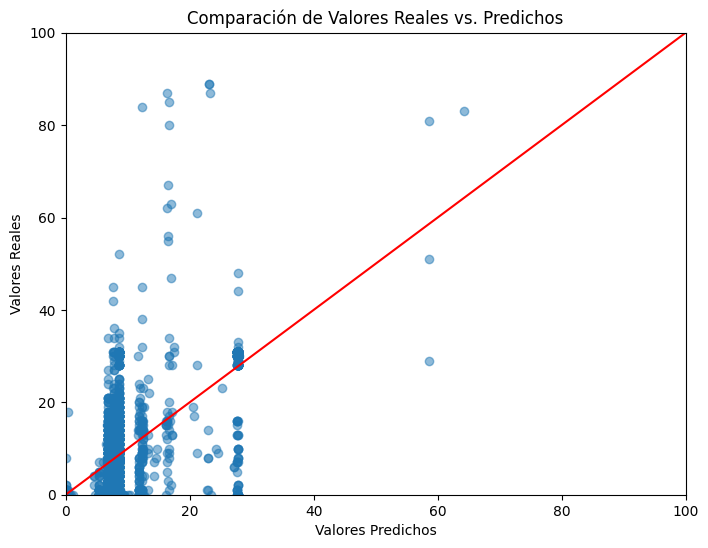

In [15]:
plot_predictions_vs_actual(y_test,y_pred_forest)

In [16]:
train_set[train_set['LOS'] >= 40] # pruevo de eliminar las 100 filas de outliers :(

,KennelCardBreed,LOS,age,intake_type_CONFISCATE,intake_type_CRUELTY,intake_type_DISPO REQ,intake_type_EUTH REQ,intake_type_FOSTER,intake_type_OWNED,intake_type_OWNER SURR,...,Breed_Vizsla,Breed_Weimaraner,Breed_Welsh Springer Spaniel,Breed_Welsh Terrier,Breed_West Highland White Terrier (Westie),Breed_Whippet,Breed_Wire Fox Terrier,Breed_Wirehaired Pointing Griffon,Breed_Working Kelpie,Breed_Yorkshire Terrier
681,1,60,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
887,0,86,0.430887,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
968,1,62,0.341995,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
992,0,45,0.724316,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1451,1,48,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13296,1,57,0.928318,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13423,1,89,0.391487,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13583,0,54,0.430887,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13636,0,53,0.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
exclude_40 = train_set[train_set['LOS'] >= 40].index

train_set_40 = train_set.drop(exclude_40, axis=0)

In [18]:
X_train_40 = train_set_40.drop('LOS',axis=1)
y_train_40 = train_set_40['LOS']

In [19]:
print(X_train_40.shape)
print(y_train_40.shape)
print(X_test.shape)
print(y_test.shape)

(13839, 300)
(13839,)
(3485, 300)
(3485,)


In [20]:
# Vuelvo a entrenar un nuevo modelo:

params_grid = {
    "n_estimators": [100,200,400],
    "max_depth": [2,4,10],
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.3,0.6,1]
}

rf_grid = RandomizedSearchCV(rf_reg, 
                               cv = 3,
                               n_iter = 20,
                               param_distributions= params_grid, 
                               scoring = "neg_mean_squared_error")


rf_grid.fit(X_train_40, y_train_40)
print("RF best_score:", np.sqrt(-rf_grid.best_score_))

RF best_score: 6.279532888945652


In [21]:
y_pred_forest = rf_grid.best_estimator_.predict(X_test)
print("MAE:", mean_absolute_error(y_test,y_pred_forest)) 
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_forest)))

MAE: 5.057844890692151
RMSE: 17.89305266879305


--> No me compensa la mejora de las metricas respecto la perdida de datos.

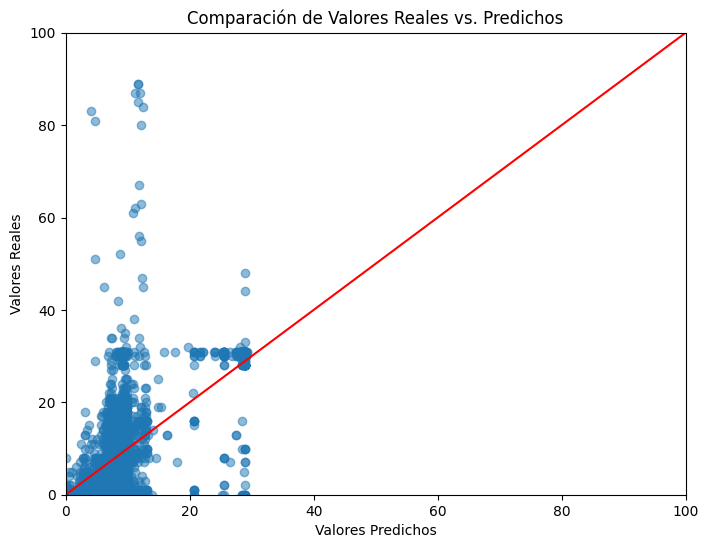

In [22]:
plot_predictions_vs_actual(y_test,y_pred_forest)

---------------------------

### Cambio de estrategia: modificar Hiperparámetros

In [23]:
X_train = train_set.drop('LOS',axis=1)
y_train = train_set['LOS']
X_test = test_set.drop('LOS',axis=1)
y_test = test_set['LOS']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13939, 300)
(13939,)
(3485, 300)
(3485,)


In [36]:
param_dist = {
    'n_estimators': [100, 200, 400, 600, 800, 1000],
    'max_depth': [None, 2, 4, 6, 8, 10, 12],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_samples': [0.3, 0.6, 0.9, 1],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['squared_error', 'absolute_error']
}

random_search = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_dist, 
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [33]:
y_pred = rf_grid.best_estimator_.predict(X_test)
print("MAE:", mean_absolute_error(y_test,y_pred)) 
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 5.292986272376702
RMSE: 17.6783589743616
